In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Loading Data

In [78]:
df = pd.read_csv(r'C:\Users\aabidh musthaq\Desktop\MAchine lea projects\Competition\Data strom clustering\customer_dataset.csv')

c:\Program Files\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### EDA & Analysis part

In [79]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      570000 non-null  int64  
 1   average_monthly_spend            560614 non-null  object 
 2   average_monthly_visit_frequency  560672 non-null  object 
 3   average_monthly_basket_size      560714 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.4+ MB


In [81]:
#Check string values in Numeric Columns
import re

# Function to check if a value contains words
def contains_words(s):
    if isinstance(s, str):
        return bool(re.search('[a-zA-Z]', s))
    return False

rows_with_words = []

# Find all cells with words and print their locations
for col in ['average_monthly_spend','average_monthly_visit_frequency','average_monthly_basket_size']:
    for idx, value in df[col].items():
        if contains_words(value):
            rows_with_words.append(idx)
            print(f"Cell at row {idx}, column '{col}' contains words: '{value}'")

Cell at row 26, column 'average_monthly_spend' contains words: 'nine hundred'
Cell at row 322986, column 'average_monthly_visit_frequency' contains words: 'one point two'
Cell at row 323648, column 'average_monthly_visit_frequency' contains words: 'nine point five'
Cell at row 324577, column 'average_monthly_visit_frequency' contains words: 'two'
Cell at row 326775, column 'average_monthly_visit_frequency' contains words: 'twenty two'
Cell at row 569999, column 'average_monthly_visit_frequency' contains words: 'three point four'


In [82]:
# Function to convert worded numbers to numerical values with error handling
from word2number import w2n

def convert_words_to_numbers(text):
    try:
        return w2n.word_to_num(text)
    except:
        return text

# Columns to be checked and converted
columns_to_convert = ['average_monthly_spend','average_monthly_visit_frequency','average_monthly_basket_size']

# Apply the correction and conversion function to the specified columns
for col in columns_to_convert:
    df[col] = df[col].apply(lambda x: convert_words_to_numbers(x) if isinstance(x, str) else x)

# Print specific rows after transformation
print("\nAfter transformation:\n", df.loc[rows_with_words])


After transformation:
         customer_id  average_monthly_spend average_monthly_visit_frequency  \
26               27                  900.0                             1.9   
322986       322987                 8017.0                             1.2   
323648       323649                92323.0                             9.5   
324577       324578                 6425.0                               2   
326775       326776                96690.0                              22   
569999       244801                 4225.0                             3.4   

        average_monthly_basket_size  
26                             1.24  
322986                         4.00  
323648                        35.22  
324577                         3.62  
326775                        17.52  
569999                         1.92  


In [83]:
#Check string values in Numeric Columns
import re

# Function to check if a value contains words
def contains_words(s):
    if isinstance(s, str):
        return bool(re.search('[a-zA-Z]', s))
    return False

rows_with_words = []

# Find all cells with words and print their locations
for col in ['average_monthly_spend','average_monthly_visit_frequency','average_monthly_basket_size']:
    for idx, value in df[col].items():
        if contains_words(value):
            rows_with_words.append(idx)
            print(f"Cell at row {idx}, column '{col}' contains words: '{value}'")

In [84]:
zero_count = (df == 0).sum().sum()
print(zero_count)

11


In [85]:
df = df[(df[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] != 0).any(axis=1)] 

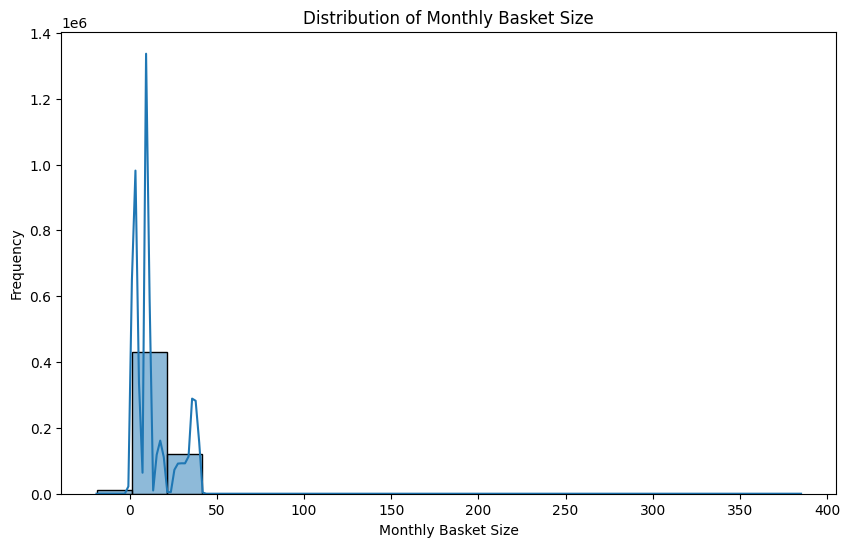

In [86]:
# Histogram of monthly basket size
plt.figure(figsize=(10, 6))
sns.histplot(df['average_monthly_basket_size'], bins=20, kde=True)
plt.title('Distribution of Monthly Basket Size')
plt.xlabel('Monthly Basket Size')
plt.ylabel('Frequency')
plt.show()

                             customer_id  average_monthly_spend  \
customer_id                     1.000000               0.000049   
average_monthly_spend           0.000049               1.000000   
average_monthly_basket_size    -0.000520               0.450682   

                             average_monthly_basket_size  
customer_id                                    -0.000520  
average_monthly_spend                           0.450682  
average_monthly_basket_size                     1.000000  


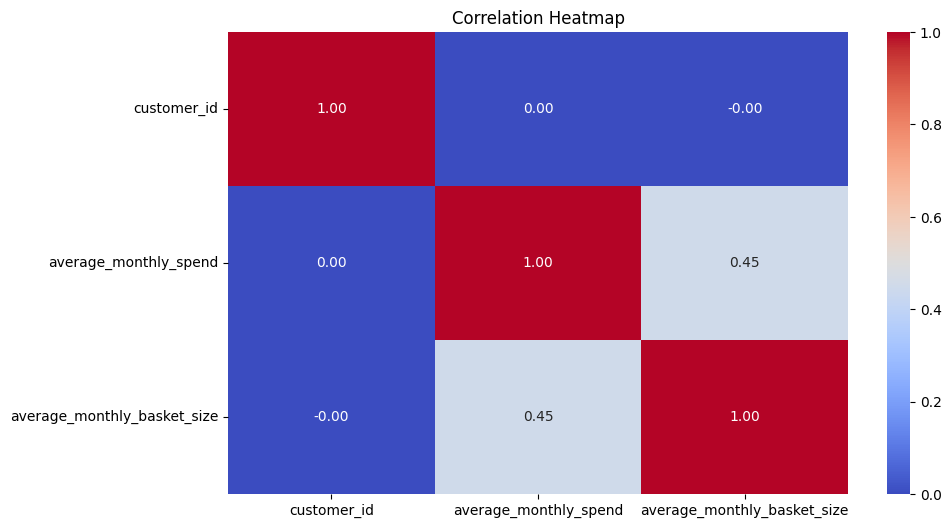

In [87]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

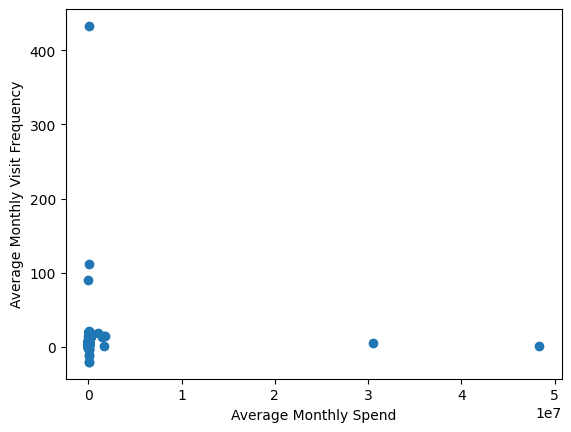

In [88]:
plt.scatter(df['average_monthly_spend'], df['average_monthly_visit_frequency'])
plt.xlabel('Average Monthly Spend')
plt.ylabel('Average Monthly Visit Frequency')
plt.show()


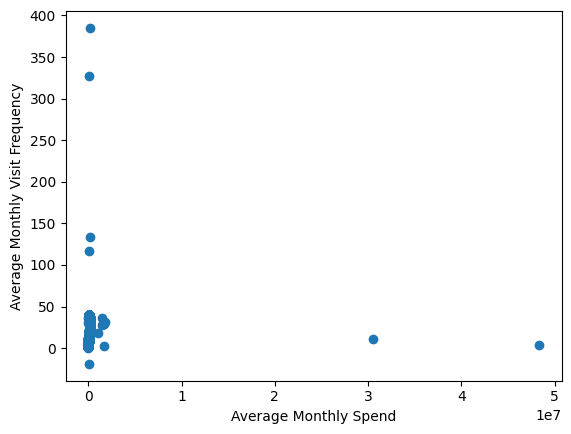

In [89]:
plt.scatter(df['average_monthly_spend'], df['average_monthly_basket_size'])
plt.xlabel('Average Monthly Spend')
plt.ylabel('Average Monthly Visit Frequency')
plt.show()


In [90]:
df.shape

(569998, 4)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569998 entries, 0 to 569999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      569998 non-null  int64  
 1   average_monthly_spend            560612 non-null  float64
 2   average_monthly_visit_frequency  560670 non-null  object 
 3   average_monthly_basket_size      560712 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.7+ MB


In [92]:
df['average_monthly_visit_frequency'] = df['average_monthly_visit_frequency'].astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569998 entries, 0 to 569999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      569998 non-null  int64  
 1   average_monthly_spend            560612 non-null  float64
 2   average_monthly_visit_frequency  560670 non-null  float64
 3   average_monthly_basket_size      560712 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 21.7 MB


In [94]:
df.isnull().sum()

customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64

In [95]:
df.isnull().all(axis=1).sum() # Check for rows with all missing values

0

In [96]:
df.dropna(inplace=True)

In [97]:
df["customer_id"].duplicated().sum()

10000

In [98]:
df.drop_duplicates(subset=['customer_id', 'average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size'], inplace=True)

In [99]:
df["customer_id"].duplicated().sum()

3

In [100]:
duplicated_rows = df[df["customer_id"].duplicated(keep=False)]
print(duplicated_rows)

        customer_id  average_monthly_spend  average_monthly_visit_frequency  \
244800       244801                 4225.0                             2.94   
322879       322880               -12334.0                             2.97   
514835       514836                11460.0                            -1.00   
568257       322880                14232.0                             2.97   
568681       514836                11460.0                             1.97   
569999       244801                 4225.0                             3.40   

        average_monthly_basket_size  
244800                         1.92  
322879                         4.80  
514835                         3.10  
568257                         4.80  
568681                         3.10  
569999                         1.92  


In [101]:
indexes_to_remove = [244800, 322879, 514835]
df = df.drop(indexes_to_remove)

In [102]:
df["customer_id"].duplicated().sum()

0

In [103]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,531998.000000,5.319980e+05,531998.000000,531998.000000
mean,280057.311565,4.825919e+04,6.879099,13.292828
std,161691.789045,9.173141e+04,5.323572,12.039063
min,1.000000,-1.000000e+00,-20.000000,-19.000000
25%,139923.250000,1.049900e+04,2.390000,3.800000
50%,280108.500000,3.196000e+04,5.600000,9.790000
75%,420172.750000,8.541950e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [104]:
negative_spend = df['average_monthly_spend'].lt(0)
negative_visit_frequency = df['average_monthly_visit_frequency'].lt(0)
negative_basket_size = df['average_monthly_basket_size'].lt(0)

In [105]:
negative_spend = df['average_monthly_spend'].lt(0)
negative_visit_frequency = df['average_monthly_visit_frequency'].lt(0)
negative_basket_size = df['average_monthly_basket_size'].lt(0)
count_negative_spend = negative_spend.sum()
count_negative_visit_frequency = negative_visit_frequency.sum()
count_negative_basket_size = negative_basket_size.sum()

In [106]:
count_negative_spend #checking negatiive values in average_monthly_spend

2

In [107]:
count_negative_visit_frequency #checking negatiive values in average_monthly_visit_frequency

8

In [108]:
count_negative_basket_size #checking negatiive values in average_monthly_basket_size

1

In [109]:
df.shape

(531998, 4)

In [110]:
# Check for negative values in rows
df = df[~(df < 0).any(axis=1)]

In [111]:
df.shape

(531987, 4)

In [112]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,531987.000000,5.319870e+05,531987.000000,531987.000000
mean,280058.969091,4.825925e+04,6.879321,13.292917
std,161689.737870,9.173222e+04,5.323167,12.039042
min,1.000000,0.000000e+00,1.000000,0.000000
25%,139926.500000,1.049900e+04,2.390000,3.800000
50%,280109.000000,3.196000e+04,5.600000,9.790000
75%,420172.500000,8.541900e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [113]:
df.isnull().sum()

customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64

In [114]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,531987.000000,5.319870e+05,531987.000000,531987.000000
mean,280058.969091,4.825925e+04,6.879321,13.292917
std,161689.737870,9.173222e+04,5.323167,12.039042
min,1.000000,0.000000e+00,1.000000,0.000000
25%,139926.500000,1.049900e+04,2.390000,3.800000
50%,280109.000000,3.196000e+04,5.600000,9.790000
75%,420172.500000,8.541900e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [115]:
# Assuming 'df' is your DataFrame
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']
for column in columns:
    df = df[df[column] != 0]

In [116]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,531983.000000,5.319830e+05,531983.000000,531983.000000
mean,280057.919548,4.825961e+04,6.879318,13.292888
std,161689.681546,9.173247e+04,5.323165,12.038999
min,1.000000,1.000000e+00,1.000000,1.000000
25%,139925.500000,1.049900e+04,2.390000,3.800000
50%,280107.000000,3.196000e+04,5.600000,9.790000
75%,420171.500000,8.542000e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


### Scaling the dataset 

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
features = df[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']]
scaled_features = scaler.fit_transform(features)

### Model Building

In [119]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
df['cluster1'] = gmm.fit_predict(scaled_features)

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster2'] = kmeans.fit_predict(scaled_features)

In [121]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
0,1,790.0,1.11,2.84,4,4
1,2,176875.0,15.74,33.83,1,1
3,4,38542.0,7.82,10.73,0,0
4,5,48712.0,7.51,10.04,0,0
5,6,172333.0,14.16,35.06,1,1


In [122]:
df.tail()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
559998,559999,3876.0,1.14,2.84,4,4
559999,560000,1556.0,2.32,3.48,4,4
568257,322880,14232.0,2.97,4.80,4,4
568681,514836,11460.0,1.97,3.10,4,4
569999,244801,4225.0,3.40,1.92,4,4


In [123]:
cluster_1 = df[df['cluster1'] == 0 ]
cluster_1

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
3,4,38542.0,7.82,10.73,0,0
4,5,48712.0,7.51,10.04,0,0
14,15,38029.0,4.49,10.22,0,0
17,18,48821.0,4.05,10.65,0,0
18,19,38169.0,5.93,9.42,0,0
...,...,...,...,...,...,...
559987,559988,28670.0,4.76,10.71,0,0
559990,559991,45671.0,5.15,9.46,0,0
559992,559993,24814.0,6.89,9.63,0,0
559995,559996,42002.0,5.10,9.72,0,0


In [124]:
cluster_2 = df[df['cluster2'] == 0 ]
cluster_2

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
3,4,38542.0,7.82,10.73,0,0
4,5,48712.0,7.51,10.04,0,0
14,15,38029.0,4.49,10.22,0,0
17,18,48821.0,4.05,10.65,0,0
18,19,38169.0,5.93,9.42,0,0
...,...,...,...,...,...,...
559987,559988,28670.0,4.76,10.71,0,0
559990,559991,45671.0,5.15,9.46,0,0
559992,559993,24814.0,6.89,9.63,0,0
559995,559996,42002.0,5.10,9.72,0,0


In [125]:
cluster_4 = df[df['cluster1'] == 1 ]
cluster_4

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
1,2,176875.0,15.74,33.83,1,1
5,6,172333.0,14.16,35.06,1,1
6,7,166849.0,14.87,27.29,1,1
8,9,90730.0,10.99,37.65,1,1
23,24,177857.0,14.23,31.04,1,1
...,...,...,...,...,...,...
559966,559967,84786.0,9.72,39.02,1,1
559967,559968,167382.0,15.66,32.27,1,1
559981,559982,101707.0,11.11,39.13,1,1
559991,559992,97605.0,11.30,39.14,1,1


In [126]:
cluster_5 = df[df['cluster1'] == 2 ]
cluster_5

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
323786,323787,48330000.0,1.79,4.22,2,2
324956,324957,30565222.0,5.60,10.73,2,2


In [127]:
cluster_7 = df[df['cluster1'] == 3 ]
cluster_7

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
73,74,97067.0,18.67,18.22,3,3
75,76,104067.0,18.69,16.05,3,3
76,77,95109.0,19.58,18.81,3,3
106,107,85005.0,18.71,16.22,3,3
109,110,89436.0,18.80,19.46,3,3
...,...,...,...,...,...,...
559910,559911,89513.0,18.93,18.00,3,3
559915,559916,87445.0,19.26,17.34,3,3
559941,559942,98135.0,18.54,19.80,3,3
559956,559957,87018.0,19.41,16.27,3,3


In [128]:
cluster_10 = df[df['cluster2'] == 4 ]
cluster_10

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2
0,1,790.0,1.11,2.84,4,4
9,10,12148.0,2.85,4.02,4,4
10,11,9181.0,1.43,1.84,4,4
11,12,4296.0,2.98,2.45,4,4
12,13,13604.0,1.37,1.91,4,4
...,...,...,...,...,...,...
559998,559999,3876.0,1.14,2.84,4,4
559999,560000,1556.0,2.32,3.48,4,4
568257,322880,14232.0,2.97,4.80,4,4
568681,514836,11460.0,1.97,3.10,4,4


### Result analysis 

In [129]:
# Define a dictionary with the cluster labels
cluster_labels = {
    2: 'Premium customers',
    4: 'Low level',
    1: 'High end - loyal',
    0: 'Medium level',
    3: 'High end - Frequent'
}
# Use the map() function to apply the dictionary to the cluster column
df['Customer_category'] = df['cluster1'].map(cluster_labels)

In [130]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2,Customer_category
0,1,790.0,1.11,2.84,4,4,Low level
1,2,176875.0,15.74,33.83,1,1,High end - loyal
3,4,38542.0,7.82,10.73,0,0,Medium level
4,5,48712.0,7.51,10.04,0,0,Medium level
5,6,172333.0,14.16,35.06,1,1,High end - loyal


In [131]:
min_avg_monthly_spend_cluster2 = df[df['cluster2'] == 2]['average_monthly_spend'].min()
print("Minimum average monthly spend for cluster :", min_avg_monthly_spend_cluster2)

Minimum average monthly spend for cluster : 30565222.0


In [132]:
# Define the percentiles we want to calculate
import numpy as np

# Calculate percentiles for each variable in each cluster
percentiles = df.groupby('cluster1').quantile([0, 1])

# Display the percentiles
percentiles

customer_id  average_monthly_spend  \
cluster1                                         
0        0          4.0                20000.0   
         1     559998.0                49999.0   
1        0          2.0                80001.0   
         1     559995.0              1756340.0   
2        0     323787.0             30565222.0   
         1     324957.0             48330000.0   
3        0         74.0                  371.0   
         1     559984.0               109999.0   
4        0          1.0                    1.0   
         1     560000.0                14999.0   

            average_monthly_visit_frequency  average_monthly_basket_size  \
cluster1                                                                   
0        0                             4.00                         9.00   
         1                             7.99                        10.99   
1        0                             1.25                         2.39   
         1                            19.96                       385.04   
2        0                             1.79                         4.22   
         1                             5.60                        10.73   
3        0                            18.50                         2.16   
         1                           432.74                        37.82   
4        0                             1.00                         1.00   
         1                             3.40                         4.99   

            cluster2  
cluster1              
0        0       0.0  
         1       0.0  
1        0       1.0  
         1       3.0  
2        0       2.0  
         1       2.0  
3        0       3.0  
         1       3.0  
4        0       4.0  
         1       4.0

In [133]:
### Customer category based on the  ustomer segments 

   # if 0 <= row['spend_percentile'] <= 10:
   #     df.at[idx, 'spend_cluster'] = 'Low'
   # elif 10 < row['spend_percentile'] <= 85:
   #     df.at[idx, 'spend_cluster'] = 'Average'
   # elif 85 < row['spend_percentile'] <= 95:
   #     df.at[idx, 'spend_cluster'] = 'High'
   # elif 95 < row['spend_percentile'] <= 100:
   #     df.at[idx, 'spend_cluster'] = 'Very High'
   # if 0 <= row['visit_percentile'] <= 20:
   #     df.at[idx, 'visit_frequency_cluster'] = 'Low'
   # elif 20 < row['visit_percentile'] <= 80:
   #     df.at[idx, 'visit_frequency_cluster'] = 'Average'
   # elif 80 <= row['visit_percentile'] <= 94:
   #     df.at[idx, 'visit_frequency_cluster'] = 'High'
   #elif 94 < row['visit_percentile'] <= 100:
    #    df.at[idx, 'visit_frequency_cluster'] = 'Very High'

   # if 0 <= row['basket_percentile'] <= 20:
   #     df.at[idx, 'basket_size_cluster'] = 'Low'
   # elif 20 < row['basket_percentile'] <= 80:
   #     df.at[idx, 'basket_size_cluster'] = 'Average'
   # elif 80 <= row['basket_percentile'] <= 94:
    #    df.at[idx, 'basket_size_cluster'] = 'High'
   # elif 94 < row['basket_percentile'] <= 100:
    #    df.at[idx, 'basket_size_cluster'] = 'Very High'

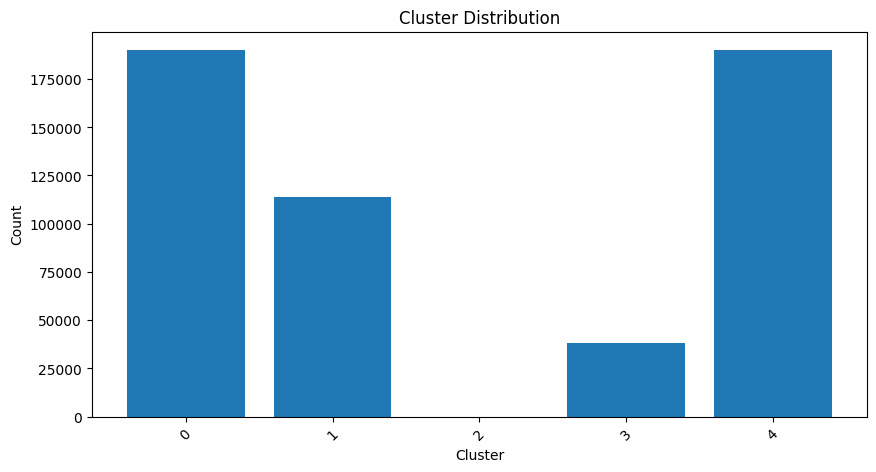

In [134]:
cluster_counts = df['cluster1'].value_counts()

# Create a bar graph for the cluster column
plt.figure(figsize=(10, 5))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.xticks(rotation=45)
plt.show()

Model building for individual cluster

In [135]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the number of clusters
n_clusters = 4  # You can adjust this as needed

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled and clustered
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']

# Scale the columns
scaled_columns = {}
for col in columns:
    X = df[[col]]
    scaled_columns[col] = scaler.fit_transform(X)

# Perform KMeans clustering for each scaled column separately
for col in columns:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)

    # Fit KMeans model to the scaled data
    kmeans.fit(scaled_columns[col])

    # Add cluster labels to the DataFrame
    df[f'{col}_cluster'] = kmeans.labels_

In [136]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2,Customer_category,average_monthly_spend_cluster,average_monthly_visit_frequency_cluster,average_monthly_basket_size_cluster
0,1,790.0,1.11,2.84,4,4,Low level,0,1,2
1,2,176875.0,15.74,33.83,1,1,High end - loyal,2,2,1
3,4,38542.0,7.82,10.73,0,0,Medium level,0,3,0
4,5,48712.0,7.51,10.04,0,0,Medium level,0,3,0
5,6,172333.0,14.16,35.06,1,1,High end - loyal,2,2,1


In [137]:
# Calculate percentiles for each variable in each cluster
percentiles = df.groupby('average_monthly_spend_cluster').quantile([0, 1])

# Display the percentiles
percentiles

customer_id  average_monthly_spend  \
average_monthly_spend_cluster                                         
0                             0          1.0                    1.0   
                              1     560000.0                49999.0   
1                             0     324957.0             30565222.0   
                              1     324957.0             30565222.0   
2                             0          2.0                80000.0   
                              1     559995.0              1756340.0   
3                             0     323787.0             48330000.0   
                              1     323787.0             48330000.0   

                                 average_monthly_visit_frequency  \
average_monthly_spend_cluster                                      
0                             0                             1.00   
                              1                           432.74   
1                             0                             5.60   
                              1                             5.60   
2                             0                             1.25   
                              1                           111.54   
3                             0                             1.79   
                              1                             1.79   

                                 average_monthly_basket_size  cluster1  \
average_monthly_spend_cluster                                            
0                             0                         1.00       0.0   
                              1                        10.99       4.0   
1                             0                        10.73       2.0   
                              1                        10.73       2.0   
2                             0                         2.39       1.0   
                              1                       385.04       3.0   
3                             0                         4.22       2.0   
                              1                         4.22       2.0   

                                 cluster2  \
average_monthly_spend_cluster               
0                             0       0.0   
                              1       4.0   
1                             0       2.0   
                              1       2.0   
2                             0       1.0   
                              1       3.0   
3                             0       2.0   
                              1       2.0   

                                 average_monthly_visit_frequency_cluster  \
average_monthly_spend_cluster                                              
0                             0                                      1.0   
                              1                                      3.0   
1                             0                                      3.0   
                              1                                      3.0   
2                             0                                      0.0   
                              1                                      2.0   
3                             0                                      1.0   
                              1                                      1.0   

                                 average_monthly_basket_size_cluster  
average_monthly_spend_cluster                                         
0                             0                                  0.0  
                              1                                  2.0  
1                             0                                  0.0  
                              1                                  0.0  
2                             0                                  1.0  
                              1                                  3.0  
3                             0                                  2.0  
                              1                  

In [138]:
# Calculate percentiles for each variable in each cluster
percentiles = df.groupby('average_monthly_visit_frequency_cluster').quantile([0, 1])

# Display the percentiles
percentiles

customer_id  average_monthly_spend  \
average_monthly_visit_frequency_cluster                                         
0                                       0          9.0                80001.0   
                                        1     559995.0               109999.0   
1                                       0          1.0                    1.0   
                                        1     560000.0             48330000.0   
2                                       0          2.0                  371.0   
                                        1     559984.0              1756340.0   
3                                       0          4.0                20000.0   
                                        1     559998.0             30565222.0   

                                           average_monthly_visit_frequency  \
average_monthly_visit_frequency_cluster                                      
0                                       0                             9.00   
                                        1                            11.99   
1                                       0                             1.00   
                                        1                             3.40   
2                                       0                            14.00   
                                        1                           432.74   
3                                       0                             4.00   
                                        1                             7.99   

                                           average_monthly_basket_size  \
average_monthly_visit_frequency_cluster                                  
0                                       0                        35.00   
                                        1                       326.66   
1                                       0                         1.00   
                                        1                         4.99   
2                                       0                         2.16   
                                        1                       385.04   
3                                       0                         9.00   
                                        1                        10.99   

                                           cluster1  cluster2  \
average_monthly_visit_frequency_cluster                         
0                                       0       1.0       1.0   
                                        1       1.0       1.0   
1                                       0       1.0       1.0   
                                        1       4.0       4.0   
2                                       0       1.0       1.0   
                                        1       3.0       3.0   
3                                       0       0.0       0.0   
                                        1       2.0       2.0   

                                           average_monthly_spend_cluster  \
average_monthly_visit_frequency_cluster                                    
0                                       0                            2.0   
                                        1                            2.0   
1                                       0                            0.0   
                                        1                            3.0   
2                                       0                            0.0   
                                        1                            2.0   
3                                       0                            0.0   
                                        1                            1.0   

                                           average_monthly_basket_size_cluster  
average_monthly_visit_frequency_cluster                                         
0                                       0                                  1.0  
                                        1              

In [139]:
# Calculate percentiles for each variable in each cluster
percentiles = df.groupby('average_monthly_basket_size_cluster').quantile([0, 1])

# Display the percentiles
percentiles

customer_id  average_monthly_spend  \
average_monthly_basket_size_cluster                                         
0                                   0          4.0                20000.0   
                                    1     559998.0             30565222.0   
1                                   0          2.0                80001.0   
                                    1     559995.0              1756340.0   
2                                   0          1.0                    1.0   
                                    1     560000.0             48330000.0   
3                                   0          7.0                80000.0   
                                    1     559984.0              1046994.0   

                                       average_monthly_visit_frequency  \
average_monthly_basket_size_cluster                                      
0                                   0                             4.00   
                                    1                           432.74   
1                                   0                             9.00   
                                    1                           111.54   
2                                   0                             1.00   
                                    1                            90.00   
3                                   0                            14.00   
                                    1                            22.00   

                                       average_monthly_basket_size  cluster1  \
average_monthly_basket_size_cluster                                            
0                                   0                         9.00       0.0   
                                    1                        10.99       3.0   
1                                   0                        27.40       1.0   
                                    1                       385.04       3.0   
2                                   0                         1.00       1.0   
                                    1                         4.99       4.0   
3                                   0                        15.00       1.0   
                                    1                        27.39       3.0   

                                       cluster2  \
average_monthly_basket_size_cluster               
0                                   0       0.0   
                                    1       3.0   
1                                   0       1.0   
                                    1       3.0   
2                                   0       1.0   
                                    1       4.0   
3                                   0       1.0   
                                    1       3.0   

                                       average_monthly_spend_cluster  \
average_monthly_basket_size_cluster                                    
0                                   0                            0.0   
                                    1                            1.0   
1                                   0                            2.0   
                                    1                            2.0   
2                                   0                            0.0   
                                    1                            3.0   
3                                   0                            2.0   
                                    1                            2.0   

                                       average_monthly_visit_frequency_cluster  
average_monthly_basket_size_cluster                                             
0                                   0                                      2.0  
                                    1                                      3.0  
1                                   0                                      0.0  
                                    1                                      2.0  
2       

In [140]:
# Define the list of columns
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']

# Iterate over each column
for col in columns:
    print(f"Ranges for {col}:")
    # Iterate over each cluster
    for cluster in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = df[df[f'{col}_cluster'] == cluster]

        # Calculate the range (minimum and maximum values) for the current cluster
        cluster_min = cluster_data[col].min()
        cluster_max = cluster_data[col].max()

        print(f"Cluster {cluster}: [{cluster_min}, {cluster_max}]")
    print()

Ranges for average_monthly_spend:
Cluster 0: [1.0, 49999.0]
Cluster 1: [30565222.0, 30565222.0]
Cluster 2: [80000.0, 1756340.0]
Cluster 3: [48330000.0, 48330000.0]

Ranges for average_monthly_visit_frequency:
Cluster 0: [9.0, 11.99]
Cluster 1: [1.0, 3.4]
Cluster 2: [14.0, 432.74]
Cluster 3: [4.0, 7.99]

Ranges for average_monthly_basket_size:
Cluster 0: [9.0, 10.99]
Cluster 1: [27.4, 385.04]
Cluster 2: [1.0, 4.99]
Cluster 3: [15.0, 27.39]



In [141]:
# Define the list of cluster columns
cluster_columns = ['average_monthly_spend_cluster', 'average_monthly_visit_frequency_cluster', 'average_monthly_basket_size_cluster']

# Iterate over each cluster column
for col in cluster_columns:
    print(f"Counts for {col}:")
    # Get and print the counts for each cluster
    print(df[col].value_counts())
    print()

Counts for average_monthly_spend_cluster:
0    380095
2    151886
3         1
1         1
Name: average_monthly_spend_cluster, dtype: int64

Counts for average_monthly_visit_frequency_cluster:
3    190118
1    189978
2     85479
0     66408
Name: average_monthly_visit_frequency_cluster, dtype: int64

Counts for average_monthly_basket_size_cluster:
0    190119
2    189979
1    103453
3     48432
Name: average_monthly_basket_size_cluster, dtype: int64



In [142]:
# Calculate percentiles for every 5%
percentiles_spend = np.percentile(df['average_monthly_spend'], np.arange(0, 101, 5))

# Print percentiles for average monthly spend
print("Percentiles for average monthly spend:")
for i, p in enumerate(range(0, 101, 5)):
    print(f"{p}th percentile: {percentiles_spend[i]}")

# Calculate percentiles for every 5%
percentiles_visit_frequency = np.percentile(df['average_monthly_visit_frequency'], np.arange(0, 101, 5))

# Print percentiles for average monthly visit frequency
print("Percentiles for average monthly visit frequency:")
for i, p in enumerate(range(0, 101, 5)):
    print(f"{p}th percentile: {percentiles_visit_frequency[i]}")

# Calculate percentiles for every 5%
percentiles_basket_size = np.percentile(df['average_monthly_basket_size'], np.arange(0, 101, 5))

# Print percentiles for average monthly basket size
print("Percentiles for average monthly basket size:")
for i, p in enumerate(range(0, 101, 5)):
    print(f"{p}th percentile: {percentiles_basket_size[i]}")


Percentiles for average monthly spend:
0th percentile: 1.0
5th percentile: 2108.0
10th percentile: 4187.0
15th percentile: 6285.0
20th percentile: 8383.0
25th percentile: 10499.0
30th percentile: 12602.0
35th percentile: 14696.0
40th percentile: 23625.0
45th percentile: 27782.0
50th percentile: 31960.0
55th percentile: 36210.0
60th percentile: 40409.0
65th percentile: 44588.0
70th percentile: 48777.399999999965
75th percentile: 85420.0
80th percentile: 92997.60000000003
85th percentile: 100677.0
90th percentile: 108364.0
95th percentile: 157511.0
100th percentile: 48330000.0
Percentiles for average monthly visit frequency:
0th percentile: 1.0
5th percentile: 1.28
10th percentile: 1.56
15th percentile: 1.84
20th percentile: 2.11
25th percentile: 2.39
30th percentile: 2.67
35th percentile: 2.95
40th percentile: 4.47
45th percentile: 5.04
50th percentile: 5.6
55th percentile: 6.16
60th percentile: 6.71
65th percentile: 7.27
70th percentile: 7.83
75th percentile: 9.85
80th percentile: 11.0

In [143]:
# Define thresholds based on the selected percentiles
spend_thresholds = {
    'Low': 23625.0,
    'Average': 85420.0,
    'High': 157511.0,
}

visit_frequency_thresholds = {
    'Low': 4.47,
    'Average': 9.85,
    'High': 18.94,
}

basket_size_thresholds = {
    'Low': 4.91,
    'Average': 17.48,
    'High': 37.99,
}

In [144]:
# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    # Check the cluster range for average_monthly_spend
    if row['average_monthly_spend'] <= spend_thresholds['Low']:
        df.at[idx, 'spend_cluster'] = 'Low'
    elif row['average_monthly_spend'] <= spend_thresholds['Average']:
        df.at[idx, 'spend_cluster'] = 'Average'
    elif row['average_monthly_spend'] <= spend_thresholds['High']:
        df.at[idx, 'spend_cluster'] = 'High'
    else:
        df.at[idx, 'spend_cluster'] = 'Very High'

    # Check the cluster range for average_monthly_visit_frequency
    if row['average_monthly_visit_frequency'] <= visit_frequency_thresholds['Low']:
        df.at[idx, 'visit_frequency_cluster'] = 'Low'
    elif row['average_monthly_visit_frequency'] <= visit_frequency_thresholds['Average']:
        df.at[idx, 'visit_frequency_cluster'] = 'Average'
    elif row['average_monthly_visit_frequency'] <= visit_frequency_thresholds['High']:
        df.at[idx, 'visit_frequency_cluster'] = 'High'
    else:
        df.at[idx, 'visit_frequency_cluster'] = 'Very High'

    # Check the cluster range for average_monthly_basket_size
    if row['average_monthly_basket_size'] <= basket_size_thresholds['Low']:
        df.at[idx, 'basket_size_cluster'] = 'Low'
    elif row['average_monthly_basket_size'] <= basket_size_thresholds['Average']:
        df.at[idx, 'basket_size_cluster'] = 'Average'
    elif row['average_monthly_basket_size'] <= basket_size_thresholds['High']:
        df.at[idx, 'basket_size_cluster'] = 'High'
    else:
        df.at[idx, 'basket_size_cluster'] = 'Very High'

In [145]:
# Define customer categories based on clusters
df['customer_category'] = 'Low level'
df.loc[
    (df['spend_cluster'] == 'Average') &
    (df['visit_frequency_cluster'] == 'Average') &
    (df['basket_size_cluster'] == 'Average'),
    'customer_category'] = 'Medium level'

df.loc[
    (df['spend_cluster'] == 'Very High') &
    (df['visit_frequency_cluster'] == 'High') &
    (df['basket_size_cluster'] == 'High'),
    'customer_category'] = 'High end - Premium'

df.loc[
    (df['spend_cluster'] == 'High') &
    (df['visit_frequency_cluster'] == 'Average') &
    (df['basket_size_cluster'] == 'Very High'),
    'customer_category'] = 'High end - Loyal'

df.loc[
    (df['spend_cluster'] == 'High') &
    (df['visit_frequency_cluster'] == 'Very High') &
    (df['basket_size_cluster'] == 'Average'),
    'customer_category'] = 'High end - Frequent'

In [146]:
# Assuming 'df' is your DataFrame and 'columns_to_drop' is a list of columns you want to drop
columns_to_drop = ['average_monthly_spend_cluster', 'average_monthly_visit_frequency_cluster', 'average_monthly_basket_size_cluster']
df = df.drop(columns=columns_to_drop)

In [147]:
# Get the final counts of all categories
category_counts = df['customer_category'].value_counts()
print(category_counts)

Low level              341228
Medium level           147180
High end - Premium      26596
High end - Frequent     10796
High end - Loyal         6183
Name: customer_category, dtype: int64


In [148]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster1,cluster2,Customer_category,spend_cluster,visit_frequency_cluster,basket_size_cluster,customer_category
0,1,790.0,1.11,2.84,4,4,Low level,Low,Low,Low,Low level
1,2,176875.0,15.74,33.83,1,1,High end - loyal,Very High,High,High,High end - Premium
3,4,38542.0,7.82,10.73,0,0,Medium level,Average,Average,Average,Medium level
4,5,48712.0,7.51,10.04,0,0,Medium level,Average,Average,Average,Medium level
5,6,172333.0,14.16,35.06,1,1,High end - loyal,Very High,High,High,High end - Premium
